## Importing all the Necessary Libraries

In [1]:
import numpy as np #for working with arrays
import pandas as pd #provides numerous tools for data analysis
import json # for JSON files
import datetime as dt
import hmac #a Python package that uses Hamiltonian Monte Carlo (HMC) to sample from probability distributions
import requests # library to handle requests
from pandas.io.json import json_normalize #for normalization
import matplotlib.cm as cm # Matplotlib for plotting modules
import matplotlib.colors as colors

In [20]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from geopy.geocoders import Nominatim #for getting logitude and latitude from address

In [13]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans #lets import k-means
import numpy as np
import datetime as DT
import hmac
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [3]:
import folium #importing folium so we can render maps
print('All Necessary Libraries Imported')

All Necessary Libraries Imported


## Importing data through read_csv

In [4]:
price_df = pd.read_csv("http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv")
price_df.head(100)

,{C6209F5F-241F-295E-E053-6C04A8C0DDCC},310000,2004-09-08 00:00,RM12 4DP,T,N,F,51,Unnamed: 8,BANCROFT CHASE,Unnamed: 10,HORNCHURCH,HAVERING,GREATER LONDON,A,A.1
0,{C6209F5F-4752-295E-E053-6C04A8C0DDCC},440000,2004-04-08 00:00,WD25 0DY,D,N,F,22,NaN,SHEEPCOT DRIVE,NaN,WATFORD,WATFORD,HERTFORDSHIRE,A,A
1,{C6209F5F-497D-295E-E053-6C04A8C0DDCC},415000,2004-03-26 00:00,AL1 1NL,T,N,F,6,NaN,RYDER SEED MEWS,NaN,ST ALBANS,ST ALBANS,HERTFORDSHIRE,A,A
2,{C6209F5F-9679-295E-E053-6C04A8C0DDCC},540000,2004-10-12 00:00,SW7 4DA,F,N,L,29 - 31,FLAT 8,COURTFIELD ROAD,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
3,{C6209F5F-C5BA-295E-E053-6C04A8C0DDCC},570000,2004-08-12 00:00,IP14 3JH,D,N,F,NELSONS,NaN,MOORBRIDGE LANE,HARLESTON,STOWMARKET,MID SUFFOLK,SUFFOLK,A,A
4,{C6209F5F-FB5A-295E-E053-6C04A8C0DDCC},32750,2004-05-07 00:00,SA38 9JN,F,N,L,PENLAN HOLIDAY VILLAGE,34,NaN,CENARTH,NEWCASTLE EMLYN,CARMARTHENSHIRE,CARMARTHENSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,{C6209F5F-3246-295E-E053-6C04A8C0DDCC},85000,2002-06-14 00:00,CM24 8NL,F,N,L,25,NaN,MANOR ROAD,NaN,STANSTED,UTTLESFORD,ESSEX,A,A
96,{C6209F5F-339B-295E-E053-6C04A8C0DDCC},69995,2002-02-22 00:00,SS1 2YW,F,N,L,3A,NaN,CHESTER AVENUE,NaN,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A
97,{C6209F5F-3E91-295E-E053-6C04A8C0DDCC},380000,2002-11-28 00:00,M29 8FL,F,Y,L,171,NaN,ELLIOTT STREET,TYLDESLEY,MANCHESTER,WIGAN,GREATER MANCHESTER,A,A
98,{C6209F5F-956A-295E-E053-6C04A8C0DDCC},780000,2002-08-27 00:00,W4 3UR,T,N,L,36,NaN,CHISWICK QUAY,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,A


In [5]:
price_df.columns = ['ID', 'Price', 'TransferDate', 'Postcode', 'TypeProp', 'New-Old',\
                         'frhld_lease', 'PrimAdrs', 'ScndAdrs', 'Street', 'Locality', 'Town_City',\
                         'District', 'County', 'stnrd_addtnl', 'site']
price_df.head(100)

,ID,Price,TransferDate,Postcode,TypeProp,New-Old,frhld_lease,PrimAdrs,ScndAdrs,Street,Locality,Town_City,District,County,stnrd_addtnl,site
0,{C6209F5F-4752-295E-E053-6C04A8C0DDCC},440000,2004-04-08 00:00,WD25 0DY,D,N,F,22,NaN,SHEEPCOT DRIVE,NaN,WATFORD,WATFORD,HERTFORDSHIRE,A,A
1,{C6209F5F-497D-295E-E053-6C04A8C0DDCC},415000,2004-03-26 00:00,AL1 1NL,T,N,F,6,NaN,RYDER SEED MEWS,NaN,ST ALBANS,ST ALBANS,HERTFORDSHIRE,A,A
2,{C6209F5F-9679-295E-E053-6C04A8C0DDCC},540000,2004-10-12 00:00,SW7 4DA,F,N,L,29 - 31,FLAT 8,COURTFIELD ROAD,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
3,{C6209F5F-C5BA-295E-E053-6C04A8C0DDCC},570000,2004-08-12 00:00,IP14 3JH,D,N,F,NELSONS,NaN,MOORBRIDGE LANE,HARLESTON,STOWMARKET,MID SUFFOLK,SUFFOLK,A,A
4,{C6209F5F-FB5A-295E-E053-6C04A8C0DDCC},32750,2004-05-07 00:00,SA38 9JN,F,N,L,PENLAN HOLIDAY VILLAGE,34,NaN,CENARTH,NEWCASTLE EMLYN,CARMARTHENSHIRE,CARMARTHENSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,{C6209F5F-3246-295E-E053-6C04A8C0DDCC},85000,2002-06-14 00:00,CM24 8NL,F,N,L,25,NaN,MANOR ROAD,NaN,STANSTED,UTTLESFORD,ESSEX,A,A
96,{C6209F5F-339B-295E-E053-6C04A8C0DDCC},69995,2002-02-22 00:00,SS1 2YW,F,N,L,3A,NaN,CHESTER AVENUE,NaN,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A
97,{C6209F5F-3E91-295E-E053-6C04A8C0DDCC},380000,2002-11-28 00:00,M29 8FL,F,Y,L,171,NaN,ELLIOTT STREET,TYLDESLEY,MANCHESTER,WIGAN,GREATER MANCHESTER,A,A
98,{C6209F5F-956A-295E-E053-6C04A8C0DDCC},780000,2002-08-27 00:00,W4 3UR,T,N,L,36,NaN,CHISWICK QUAY,NaN,LONDON,HOUNSLOW,GREATER LONDON,A,A


### Cleaning Data

In [6]:
# Convert the date from string to datetime so we can work with it
price_df['TransferDate'] = price_df['TransferDate'].apply(pd.to_datetime)

#We will delete past transactions which happend before 2017 because we are interested in latest transactions only
price_df.drop(price_df[price_df.TransferDate.dt.year < 2018].index, inplace=True) 

#And we will sort by the date of transfer now that it is in datetime
price_df.sort_values(by=['TransferDate'],ascending=[False],inplace=True)

In [7]:
price_df.head(10)

,ID,Price,TransferDate,Postcode,TypeProp,New-Old,frhld_lease,PrimAdrs,ScndAdrs,Street,Locality,Town_City,District,County,stnrd_addtnl,site
77590,{C6209F60-2320-295E-E053-6C04A8C0DDCC},770000,2021-06-28,BD18 4HD,D,N,F,11,NaN,STAVELEY ROAD,NaN,SHIPLEY,BRADFORD,WEST YORKSHIRE,A,A
42134,{C6209F60-453B-295E-E053-6C04A8C0DDCC},525000,2021-06-28,NN3 3HY,D,N,F,524,NaN,WELLINGBOROUGH ROAD,NaN,NORTHAMPTON,WEST NORTHAMPTONSHIRE,WEST NORTHAMPTONSHIRE,B,A
89800,{C6209F5F-5F43-295E-E053-6C04A8C0DDCC},845000,2021-06-28,B62 0LG,D,N,F,THATCHWAYS,NaN,FARLEY LANE,ROMSLEY,HALESOWEN,BROMSGROVE,WORCESTERSHIRE,A,A
68105,{C6209F60-0201-295E-E053-6C04A8C0DDCC},457500,2021-06-28,B31 2BH,S,N,F,342,NaN,HEATH ROAD SOUTH,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
61861,{C6209F5F-E628-295E-E053-6C04A8C0DDCC},600000,2021-06-28,SW11 1HG,F,N,L,35 - 37,FLAT 3,BATTERSEA RISE,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A
10794,{C6209F5E-CF42-295E-E053-6C04A8C0DDCC},1020000,2021-06-28,W5 1JQ,S,N,F,51,NaN,LYNWOOD ROAD,NaN,LONDON,EALING,GREATER LONDON,A,A
67080,{C6209F60-03FB-295E-E053-6C04A8C0DDCC},350000,2021-06-28,B14 7LP,T,N,F,87,NaN,DRAYTON ROAD,KINGS HEATH,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
28321,{C6209F60-3E59-295E-E053-6C04A8C0DDCC},264400,2021-06-28,LE7 2HA,O,N,F,1088,NaN,MELTON ROAD,SYSTON,LEICESTER,CHARNWOOD,LEICESTERSHIRE,B,A
34177,{C6209F60-2E61-295E-E053-6C04A8C0DDCC},230000,2021-06-28,EX5 7BR,S,N,F,3,NaN,POST COACH WAY,CRANBROOK,EXETER,EAST DEVON,DEVON,B,A
105454,{C6209F5F-8E5D-295E-E053-6C04A8C0DDCC},137000,2021-06-28,L14 5NJ,T,N,F,14,NaN,LITTLE BONGS,NaN,LIVERPOOL,LIVERPOOL,MERSEYSIDE,A,A


In [8]:
price_df.shape

(112220, 16)

In [9]:
df_southampton = price_df.query("Town_City == 'SOUTHAMPTON'") # Lets filter so we can only check prices in Southampton
streets = df_southampton['Street'].unique().tolist()
streets

['WEST ROAD',
 'AMPTHILL ROAD',
 'NORTHEND LANE',
 'WINCHESTER STREET',
 'POPLAR WAY',
 'SHORE ROAD',
 'PLATFORM ROAD',
 'MAIDMAN PLACE',
 'CRANBURY TERRACE',
 'CANUTE ROAD',
 'BEATTIE RISE',
 'PRESHAW ESTATE',
 'ABOVE BAR STREET',
 'IMPERIAL AVENUE',
 'ROWBOROUGH ROAD',
 'ST MARY STREET',
 'CHILWORTH OLD VILLAGE',
 'BADGERS WALK',
 'WINCHESTER ROAD',
 'REYNOLDS DALE',
 'CLOVER CLOSE',
 'REYNOLDS ROAD',
 'CROMWELL ROAD',
 'SHALES ROAD',
 'LONGLEAT GARDENS',
 'ROBIN GARDENS',
 'SPRINGFIELD',
 'MILLERS VIEW',
 'KINGSLEY ROAD',
 'BAMBER CLOSE',
 'MONARCH WAY',
 'LIVERPOOL STREET',
 'RUMBRIDGE STREET',
 'MOSAIC CLOSE',
 'CLAYHILL CLOSE',
 'MAYFIELD ROAD',
 'WESTBROOK CLOSE',
 'MORTIMER WAY',
 'WELBECK AVENUE',
 'ROMSEY ROAD',
 'KINGSMAN DRIVE',
 'COLBY STREET',
 'RINGWOOD ROAD',
 'OSBORNE ROAD SOUTH',
 'HIGH STREET',
 'BROOK LANE',
 'PROSPECT ROAD',
 'PRIORY ROAD',
 'ELMES DRIVE',
 'GREEN PARK ROAD',
 'PACIFIC CLOSE',
 'SOLOMONS LANE',
 'WARREN AVENUE',
 'ST GABRIELS ROAD',
 'RADCLIFFE ROA

In [10]:
southampton_grp_price = df_southampton.groupby(['Street'])['Price'].mean().reset_index() # lets get the avarage price for every street
southampton_grp_price.columns = ['Street', 'Avg_Price'] # lets create columns for the street according to price

In [11]:
southampton_dream = southampton_grp_price.query("(Avg_Price >= 2000) & (Avg_Price <= 120000)") 
#because our price limit is 120k this is what we will be aiming at

In [12]:
southampton_dream

,Street,Avg_Price
1,ABOVE BAR STREET,100000.0
18,ANSON DRIVE,87250.0
145,CORINNA GARDENS,92000.0
171,DARWIN ROAD,92000.0
224,FULFORD ROAD,117500.0
250,HANOVER BUILDINGS,79000.0
293,HUNTS POND ROAD,70000.0
320,KITCHENER ROAD,91000.0
398,NORHAM AVENUE,108500.0
426,PAIGNTON ROAD,61000.0


### Adding Longitude and Latitude

In [14]:
for index, item in southampton_dream.iterrows():
    print(f"index: {index}")
    print(f"item: {item}")
    print(f"item.Street only: {item.Street}")

index: 1
item: Street       ABOVE BAR STREET
Avg_Price            100000.0
Name: 1, dtype: object
item.Street only: ABOVE BAR STREET
index: 18
item: Street       ANSON DRIVE
Avg_Price        87250.0
Name: 18, dtype: object
item.Street only: ANSON DRIVE
index: 145
item: Street       CORINNA GARDENS
Avg_Price            92000.0
Name: 145, dtype: object
item.Street only: CORINNA GARDENS
index: 171
item: Street       DARWIN ROAD
Avg_Price        92000.0
Name: 171, dtype: object
item.Street only: DARWIN ROAD
index: 224
item: Street       FULFORD ROAD
Avg_Price        117500.0
Name: 224, dtype: object
item.Street only: FULFORD ROAD
index: 250
item: Street       HANOVER BUILDINGS
Avg_Price              79000.0
Name: 250, dtype: object
item.Street only: HANOVER BUILDINGS
index: 293
item: Street       HUNTS POND ROAD
Avg_Price            70000.0
Name: 293, dtype: object
item.Street only: HUNTS POND ROAD
index: 320
item: Street       KITCHENER ROAD
Avg_Price           91000.0
Name: 320, dtype: o

In [15]:
geolocator = Nominatim(user_agent = "city")

In [16]:
southampton_dream['city_coord'] = southampton_dream['Street'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

<ipython-input-16-f0c25f66481e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southampton_dream['city_coord'] = southampton_dream['Street'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))


In [17]:
southampton_dream[['Latitude', 'Longitude']] = southampton_dream['city_coord'].apply(pd.Series) # add them in columns

C:\Users\musta\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
southampton_dream

,Street,Avg_Price,city_coord,Latitude,Longitude
1,ABOVE BAR STREET,100000.0,"(50.9040038, -1.4041588)",50.904004,-1.404159
18,ANSON DRIVE,87250.0,"(39.5381467, -119.8355611)",39.538147,-119.835561
145,CORINNA GARDENS,92000.0,"(50.8629077, -1.4199711)",50.862908,-1.419971
171,DARWIN ROAD,92000.0,"(39.2853004, -87.6121742)",39.285300,-87.612174
224,FULFORD ROAD,117500.0,"(52.934919, -2.0817501)",52.934919,-2.081750
250,HANOVER BUILDINGS,79000.0,"(50.9030533, -1.4030919)",50.903053,-1.403092
293,HUNTS POND ROAD,70000.0,"(42.588029, -75.373531)",42.588029,-75.373531
320,KITCHENER ROAD,91000.0,"(49.1568679, -116.3400001)",49.156868,-116.340000
398,NORHAM AVENUE,108500.0,"(39.177682, -84.42612)",39.177682,-84.426120
426,PAIGNTON ROAD,61000.0,"(50.9247129, -1.4508099)",50.924713,-1.450810


In [19]:
#for nearer locations
southampton_dream = southampton_dream.query("(Latitude >= 50.83) & (Latitude <= 51)")
southampton_dream

,Street,Avg_Price,city_coord,Latitude,Longitude
1,ABOVE BAR STREET,100000.0,"(50.9040038, -1.4041588)",50.904004,-1.404159
145,CORINNA GARDENS,92000.0,"(50.8629077, -1.4199711)",50.862908,-1.419971
250,HANOVER BUILDINGS,79000.0,"(50.9030533, -1.4030919)",50.903053,-1.403092
426,PAIGNTON ROAD,61000.0,"(50.9247129, -1.4508099)",50.924713,-1.450810
555,ST MARYS PLACE,112000.0,"(50.9051036, -1.3976985)",50.905104,-1.397698
589,TIDES WAY,95000.0,"(50.8967348, -1.4491902)",50.896735,-1.449190


### Map

In [21]:
mid = southampton_dream['Street']
southampton_dream.drop(labels=['Street'], axis=1,inplace = True)
southampton_dream.insert(0, 'Street', mid)
southampton_dream

C:\Users\musta\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Street,Avg_Price,city_coord,Latitude,Longitude
1,ABOVE BAR STREET,100000.0,"(50.9040038, -1.4041588)",50.904004,-1.404159
145,CORINNA GARDENS,92000.0,"(50.8629077, -1.4199711)",50.862908,-1.419971
250,HANOVER BUILDINGS,79000.0,"(50.9030533, -1.4030919)",50.903053,-1.403092
426,PAIGNTON ROAD,61000.0,"(50.9247129, -1.4508099)",50.924713,-1.450810
555,ST MARYS PLACE,112000.0,"(50.9051036, -1.3976985)",50.905104,-1.397698
589,TIDES WAY,95000.0,"(50.8967348, -1.4491902)",50.896735,-1.449190


In [22]:
southampton_dream.sort_values('Avg_Price', inplace=True)

<ipython-input-22-a398f3372a1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southampton_dream.sort_values('Avg_Price', inplace=True)


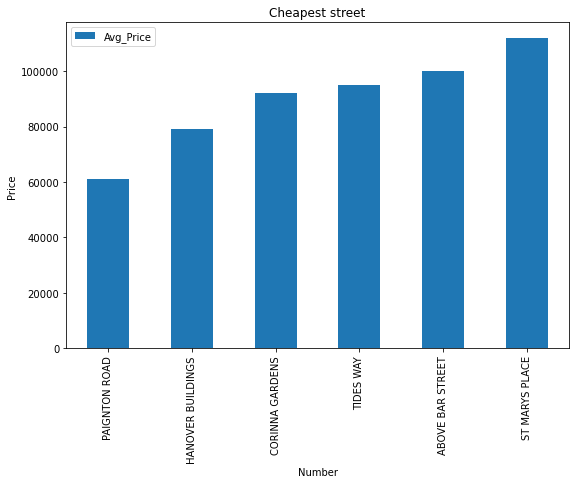

In [23]:
#plot data
southampton_dream.plot(y = "Avg_Price", x ="Street", kind='bar', figsize=(9, 6))

plt.xlabel('Number') # add to x-label to the plot
plt.ylabel('Price') # add y-label to the plot
plt.title('Cheapest street') # add title to the plot

plt.show()

In [24]:
address = 'Southampton, England'
geolocator = Nominatim(user_agent='city')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Southampton are are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Southampton are are 50.9025349, -1.404189.


In [25]:
map_southamptondream = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, price, street in zip(southampton_dream['Latitude'], southampton_dream['Longitude'], southampton_dream['Avg_Price'], southampton_dream['Street']):
    label = '{}, {}'.format(street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_southamptondream)  
map_southamptondream

In [26]:
CLIENT_ID = 'BYT4KVYZFVQRVIDNOMO1EQHBAM1MR2EKZUOXNTP0OABAY3MP' # Foursquare ID
CLIENT_SECRET = 'EBA3LIOR0FAODYJ3NVDYMIDAYCXCITDOAQPDOWPFJ5LR4050' # Foursquare Secret
VERSION = '20181206' # Foursquare API version
print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: BYT4KVYZFVQRVIDNOMO1EQHBAM1MR2EKZUOXNTP0OABAY3MP
CLIENT_SECRET:EBA3LIOR0FAODYJ3NVDYMIDAYCXCITDOAQPDOWPFJ5LR4050


In [27]:
#Lets see the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    return(nearby_venues)

In [28]:
#streets nearby
location_venues = getNearbyVenues(names=southampton_dream['Street'],
                                   latitudes=southampton_dream['Latitude'],
                                   longitudes=southampton_dream['Longitude']
                                  )

PAIGNTON ROAD
HANOVER BUILDINGS
CORINNA GARDENS
TIDES WAY
ABOVE BAR STREET
ST MARYS PLACE


In [29]:
#complete details of nearby streets alongwith venue Category
pd.DataFrame.from_dict(location_venues) # Convert to pandas Dataframe
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,PAIGNTON ROAD,50.924713,-1.450810,Costa Coffee,50.923311,-1.447299,Coffee Shop
1,PAIGNTON ROAD,50.924713,-1.450810,B&M Store,50.917406,-1.453191,Discount Store
2,PAIGNTON ROAD,50.924713,-1.450810,Tenpin,50.917679,-1.452571,Bowling Alley
3,PAIGNTON ROAD,50.924713,-1.450810,Tesco Express,50.931387,-1.449685,Grocery Store
4,PAIGNTON ROAD,50.924713,-1.450810,Tesco Express,50.918687,-1.455901,Grocery Store
...,...,...,...,...,...,...,...
315,ST MARYS PLACE,50.905104,-1.397698,Rancho's Steak House & Lounge Bar,50.899364,-1.403669,Steakhouse
316,ST MARYS PLACE,50.905104,-1.397698,West Quay Retail Park,50.904687,-1.411345,Shopping Plaza
317,ST MARYS PLACE,50.905104,-1.397698,Medbar & Kitchen,50.898166,-1.398486,Restaurant
318,ST MARYS PLACE,50.905104,-1.397698,The Giddy Bridge (Wetherspoon),50.910888,-1.404627,Pub


In [30]:
location_venues = location_venues[(location_venues.Venue_Category == 'Pizza Place') | (location_venues.Venue_Category == 'Grocery Store') | (location_venues.Venue_Category == 'Fast Food Restaurant')]
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
3,PAIGNTON ROAD,50.924713,-1.450810,Tesco Express,50.931387,-1.449685,Grocery Store
4,PAIGNTON ROAD,50.924713,-1.450810,Tesco Express,50.918687,-1.455901,Grocery Store
6,PAIGNTON ROAD,50.924713,-1.450810,KFC,50.918206,-1.456815,Fast Food Restaurant
9,PAIGNTON ROAD,50.924713,-1.450810,McDonald's,50.918145,-1.457093,Fast Food Restaurant
17,HANOVER BUILDINGS,50.903053,-1.403092,Franco Manca,50.902527,-1.406314,Pizza Place
23,HANOVER BUILDINGS,50.903053,-1.403092,Taco Bell,50.903125,-1.403631,Fast Food Restaurant
27,HANOVER BUILDINGS,50.903053,-1.403092,The Stable,50.907612,-1.404548,Pizza Place
84,HANOVER BUILDINGS,50.903053,-1.403092,Roosters Piri Piri,50.911438,-1.404212,Fast Food Restaurant
97,HANOVER BUILDINGS,50.903053,-1.403092,Tesco Express,50.906142,-1.396639,Grocery Store
102,HANOVER BUILDINGS,50.903053,-1.403092,The Co-operative Food,50.898222,-1.404173,Grocery Store


In [31]:
#check which  street has maximum options
location_venues.groupby('Street').count()

,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Street,,,,,,
ABOVE BAR STREET,7,7,7,7,7,7
HANOVER BUILDINGS,6,6,6,6,6,6
PAIGNTON ROAD,4,4,4,4,4,4
ST MARYS PLACE,6,6,6,6,6,6
TIDES WAY,1,1,1,1,1,1


In [32]:
# one hot encoding
venues_onehot = pd.get_dummies(location_venues[['Venue_Category']], prefix="", prefix_sep="")
# add street column back to dataframe
venues_onehot['Street'] = location_venues['Street'] 
# move street column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
fixed_columns
venues_onehot = venues_onehot[fixed_columns]
venues_onehot

,Street,Fast Food Restaurant,Grocery Store,Pizza Place
3,PAIGNTON ROAD,0,1,0
4,PAIGNTON ROAD,0,1,0
6,PAIGNTON ROAD,1,0,0
9,PAIGNTON ROAD,1,0,0
17,HANOVER BUILDINGS,0,0,1
23,HANOVER BUILDINGS,1,0,0
27,HANOVER BUILDINGS,0,0,1
84,HANOVER BUILDINGS,1,0,0
97,HANOVER BUILDINGS,0,1,0
102,HANOVER BUILDINGS,0,1,0


In [33]:
venues_grouped = venues_onehot.groupby('Street').mean().reset_index()
venues_grouped

,Street,Fast Food Restaurant,Grocery Store,Pizza Place
0,ABOVE BAR STREET,0.285714,0.428571,0.285714
1,HANOVER BUILDINGS,0.333333,0.333333,0.333333
2,PAIGNTON ROAD,0.500000,0.500000,0.000000
3,ST MARYS PLACE,0.333333,0.333333,0.333333
4,TIDES WAY,0.000000,1.000000,0.000000


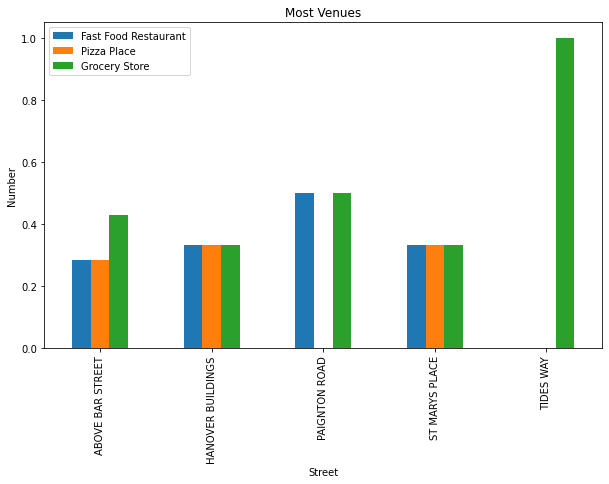

In [34]:
venues_grouped.plot(y = ["Fast Food Restaurant", "Pizza Place", "Grocery Store"], x ="Street", kind='bar', figsize=(10, 6))

plt.xlabel('Street') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Most Venues') # add title to the plot

plt.show()

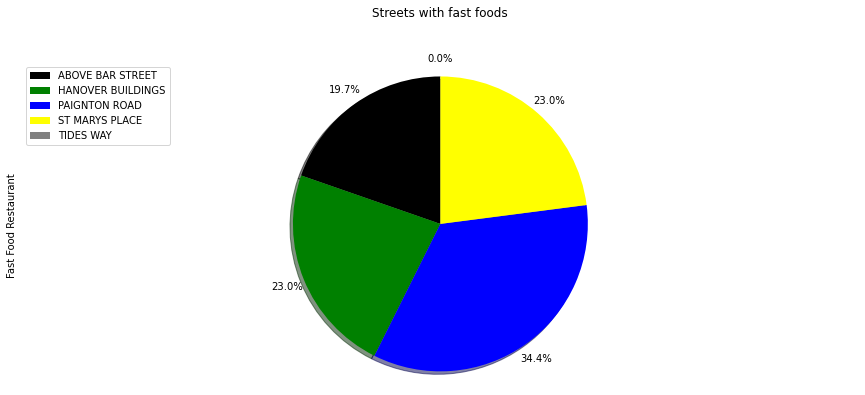

In [35]:
colors_list = ['black', 'green', 'blue', 'yellow', 'gray','coral', 'pink','red','orange','brown','lightblue','cyan','white','purple']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

venues_grouped['Fast Food Restaurant'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Streets with fast foods', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=venues_grouped.Street, loc='upper left') 

plt.show()

In [36]:
num_top_venues = 5

for hood in venues_grouped['Street']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Street'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABOVE BAR STREET----
                  venue  freq
0         Grocery Store  0.43
1  Fast Food Restaurant  0.29
2           Pizza Place  0.29


----HANOVER BUILDINGS----
                  venue  freq
0  Fast Food Restaurant  0.33
1         Grocery Store  0.33
2           Pizza Place  0.33


----PAIGNTON ROAD----
                  venue  freq
0  Fast Food Restaurant   0.5
1         Grocery Store   0.5
2           Pizza Place   0.0


----ST MARYS PLACE----
                  venue  freq
0  Fast Food Restaurant  0.33
1         Grocery Store  0.33
2           Pizza Place  0.33


----TIDES WAY----
                  venue  freq
0         Grocery Store   1.0
1  Fast Food Restaurant   0.0
2           Pizza Place   0.0




In [80]:
# Define a function to return the most common venues/facilities nearby real estate investments#

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Street']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [84]:
# create a new dataframe
# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Street'] = venues_grouped['Street']

for ind in np.arange(venues_grouped.shape[1]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

In [85]:
venues_sorted


,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,ABOVE BAR STREET,Grocery Store,Fast Food Restaurant,Pizza Place
1,HANOVER BUILDINGS,Fast Food Restaurant,Grocery Store,Pizza Place
2,PAIGNTON ROAD,Fast Food Restaurant,Grocery Store,Pizza Place
3,ST MARYS PLACE,Fast Food Restaurant,Grocery Store,Pizza Place
4,TIDES WAY,NaN,NaN,NaN


In [86]:
kclusters = 2
southampton_clustering = venues_grouped.drop('Street', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(southampton_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0])

In [87]:
# add clustering labels
venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

southampton_merged = southampton_dream

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
southampton_merged= southampton_merged.join(venues_sorted.set_index('Street'), on='Street')

southampton_merged
# check the last columns!

,Street,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
426,PAIGNTON ROAD,61000.0,"(50.9247129, -1.4508099)",50.924713,-1.450810,1.0,Fast Food Restaurant,Grocery Store,Pizza Place
250,HANOVER BUILDINGS,79000.0,"(50.9030533, -1.4030919)",50.903053,-1.403092,1.0,Fast Food Restaurant,Grocery Store,Pizza Place
145,CORINNA GARDENS,92000.0,"(50.8629077, -1.4199711)",50.862908,-1.419971,NaN,NaN,NaN,NaN
589,TIDES WAY,95000.0,"(50.8967348, -1.4491902)",50.896735,-1.449190,0.0,NaN,NaN,NaN
1,ABOVE BAR STREET,100000.0,"(50.9040038, -1.4041588)",50.904004,-1.404159,1.0,Grocery Store,Fast Food Restaurant,Pizza Place
555,ST MARYS PLACE,112000.0,"(50.9051036, -1.3976985)",50.905104,-1.397698,1.0,Fast Food Restaurant,Grocery Store,Pizza Place


In [88]:
southampton_merged = southampton_merged[np.isfinite(southampton_merged['ClusterLabels'])]
southampton_merged = southampton_merged.astype({"ClusterLabels": int})     # because some of the labels were none we made them into ints
southampton_merged

,Street,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
426,PAIGNTON ROAD,61000.0,"(50.9247129, -1.4508099)",50.924713,-1.450810,1,Fast Food Restaurant,Grocery Store,Pizza Place
250,HANOVER BUILDINGS,79000.0,"(50.9030533, -1.4030919)",50.903053,-1.403092,1,Fast Food Restaurant,Grocery Store,Pizza Place
589,TIDES WAY,95000.0,"(50.8967348, -1.4491902)",50.896735,-1.449190,0,NaN,NaN,NaN
1,ABOVE BAR STREET,100000.0,"(50.9040038, -1.4041588)",50.904004,-1.404159,1,Grocery Store,Fast Food Restaurant,Pizza Place
555,ST MARYS PLACE,112000.0,"(50.9051036, -1.3976985)",50.905104,-1.397698,1,Fast Food Restaurant,Grocery Store,Pizza Place


In [89]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(southampton_merged['Latitude'], southampton_merged['Longitude'], southampton_merged['Street'], southampton_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [94]:
southampton_merged.loc[southampton_merged['ClusterLabels'] == 0, southampton_merged.columns[[1] + list(range(1, southampton_merged.shape[1]))]].head()

,Avg_Price,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
589,95000.0,95000.0,"(50.8967348, -1.4491902)",50.896735,-1.44919,0,NaN,NaN,NaN


In [95]:
southampton_merged.loc[southampton_merged['ClusterLabels'] == 1, southampton_merged.columns[[1] + list(range(5, southampton_merged.shape[1]))]].head()

,Avg_Price,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
426,61000.0,1,Fast Food Restaurant,Grocery Store,Pizza Place
250,79000.0,1,Fast Food Restaurant,Grocery Store,Pizza Place
1,100000.0,1,Grocery Store,Fast Food Restaurant,Pizza Place
555,112000.0,1,Fast Food Restaurant,Grocery Store,Pizza Place
